

# CP2K tutorials with Lennard-Jones potential

- Offical page: https://www.cp2k.org/exercises
- Notebook: https://github.com/oschuett/cp2k-notebooks

NOTE: there is a python API [PYCP2K](https://github.com/SINGROUP/pycp2k), but should not use, since can not control which version

CP2K for windows https://github.com/brhr-iwao/CP2K_for_Windows/releases
- put the path `C:\DATA\work\w23_CP2K\cp2k-2022.1.x64-pexsi` to `system VAR`

# MS simulation 
MS run follows this tutorial https://github.com/oschuett/cp2k-notebooks/blob/master/Lennard-Jones.ipynb
NOTE:
- There is no way to make deformation in CP2K as in LAMMPS. Therefore, must run **a series** of simulations, each simulation for each distance, separately
- Similar to run MS in LAMMPS

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

import sys, re, os
from pathlib        import Path
dir_nb = Path(globals()['_dh'][0])                               # jupyter-dir: Path object    .__str__() 
sys.path.append( str(dir_nb/"cp2k-2022.1.x64-pexsi") )

In [2]:
template = """
&GLOBAL                  ! section to select the kind of calculation
   RUN_TYPE ENERGY       ! select type of calculation. In this case: ENERGY (=Single point calculation)
&END GLOBAL

&FORCE_EVAL              ! section with parameters and system description
  METHOD FIST            ! Molecular Mechanics method
  &MM                    ! specification of MM parameters 
    &FORCEFIELD          ! parameters needed to describe the potential 
    &SPLINE
    EMAX_SPLINE 10000    ! numeric parameter to ensure calculation stability. Should not be changed
    &END
        &NONBONDED       ! parameters for the non bonded interactions
          &LENNARD-JONES ! Lennard-Jones parameters
          atoms Ar Ar
          EPSILON    [K_e] 119.8
          SIGMA [angstrom]   3.401
          RCUT  [angstrom]  25.0
        &END LENNARD-JONES
      &END NONBONDED
      &CHARGE
        ATOM Ar
        CHARGE 0.0
      &END CHARGE
    &END FORCEFIELD
    &POISSON              ! solver for non periodic calculations
     PERIODIC NONE
      &EWALD
        EWALD_TYPE none
      &END EWALD
    &END POISSON
  &END MM
  &SUBSYS                 ! system description 
    &CELL
     ABC [angstrom] 10 10 10  
     PERIODIC NONE
    &END CELL
    &COORD                
      UNIT angstrom
      Ar  0 0 0
      Ar  0 0 <DIST>
    &END COORD
   &END SUBSYS
&END FORCE_EVAL"""

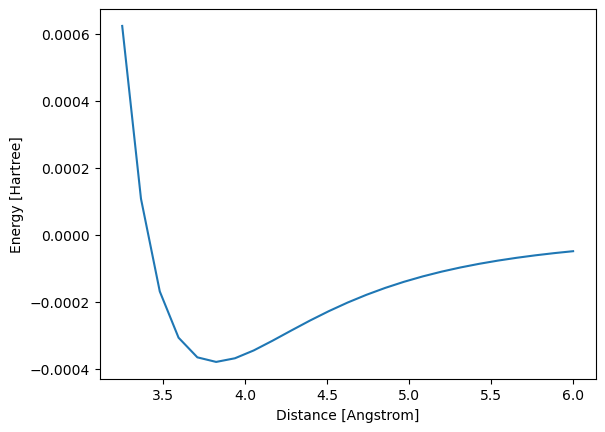

In [3]:
distances = np.linspace(start=3.25, stop=6.0, num=25)
energies = []
for dist in distances:
    # create input file
    inp = template.replace("<DIST>", "%f"%dist)
    open("energy.inp", "w").write(inp)
    
    # run CP2K
    # !cp2k.popt energy.inp > energy.out
    !startcp2k energy.inp > energy.out
    
    # retrieve energy from output
    energy_line = [line for line in open("energy.out").readlines() if "ENERGY|" in line]
    energy = float(energy_line[0].split()[-1])
    
    # store energy
    energies.append(energy)
    
# plot dissociation curve
clear_output()
plt.plot(distances, energies)
plt.xlabel("Distance [Angstrom]")
plt.ylabel("Energy [Hartree]")
plt.show()